In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train = X_train/255
X_test = X_test/255

In [19]:
model = Sequential()
model.add(Flatten(input_shape = (28,28))) #this the input layer
model.add(Dense(128, activation='relu'))  # this is the hiden layer
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # thi s ithe output layer with 10 nodes

/opt/homebrew/Caskroom/miniconda/base/envs/digit-env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


In [32]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9766 - val_loss: 0.2453
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9764 - val_loss: 0.2524
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9753 - val_loss: 0.2662
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9988 - loss: 0.0030 - val_accuracy: 0.9760 - val_loss: 0.2839
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9783 - val_loss: 0.2500
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9756 - val_loss: 0.2804
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9984 - loss: 0.0072 - val_accuracy: 0.9742 - val_loss: 0.2800
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.9990 -

In [33]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9789

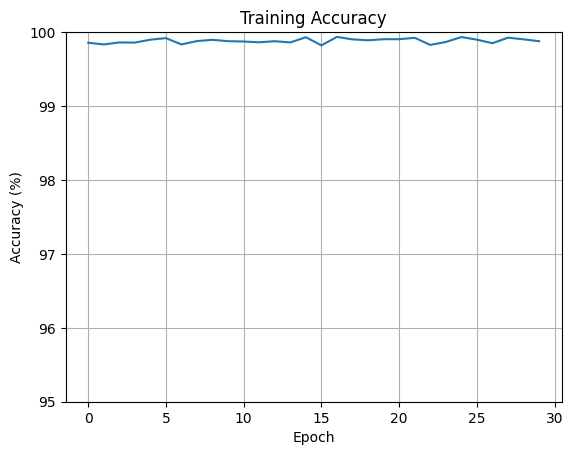

In [39]:
import matplotlib.pyplot as plt
accuracy = [a * 100 for a in history.history['accuracy']]
plt.plot(accuracy)
plt.ylim(95, 100)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")
plt.grid(True)
plt.show()